In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r"D:\Repositories\PhD\parsed_data\ICE_data\internal_combustion_engine_bearings_fixed_duplicates.csv")

In [3]:
df

,Time,Demand 1,Control 1,Output Drive 1,Channel 1,Channel 2,Channel 3,Channel 4,Channel 1 Kurtosis,Channel 2 Kurtosis,...,Rear Input 5,Rear Input 6,Rear Input 7,Rear Input 8,FAULT,RPM,HUMIDITY%,TEMPERATURE_Celsius,resultant_vibration_magnitude,resultant_vibration_magnitude_normal_dist
0,0.001450,0.125011,0.176033,0.000000,0.211458,0.209182,0.145823,1.624200e-15,2.52457,2.94874,...,0,0,0,0,1,1000,0,-10,0.331264,-1.104839
1,0.006283,0.125011,0.176033,0.000012,0.206329,0.206513,0.150478,1.643320e-15,2.32290,2.46553,...,0,0,0,0,1,1000,0,-10,0.328425,-1.113447
2,0.009633,0.125011,0.172626,0.000013,0.206351,0.194663,0.148313,1.528270e-15,2.26458,2.55488,...,0,0,0,0,1,1000,0,-10,0.320111,-1.139087
3,0.013200,0.125011,0.172626,0.000014,0.214463,0.214489,0.155652,1.791370e-15,2.53380,2.66379,...,0,0,0,0,1,1000,0,-10,0.340921,-1.076103
4,0.016583,0.125011,0.172626,0.000015,0.210449,0.198857,0.154162,1.594310e-15,2.51443,2.81510,...,0,0,0,0,1,1000,0,-10,0.328023,-1.114673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390057,27.302300,0.500044,0.515140,0.043543,0.554265,0.560519,1.633510,1.712510e-15,3.10602,3.09644,...,0,0,0,0,0,2000,50,45,1.813766,0.595405
390058,27.305700,0.500044,0.515140,0.043541,0.554672,0.560996,1.646360,1.711110e-15,3.10423,3.09293,...,0,0,0,0,0,2000,50,45,1.825617,0.601918
390059,27.309200,0.500044,0.515140,0.043536,0.555249,0.561109,1.645410,1.710140e-15,3.11372,3.09118,...,0,0,0,0,0,2000,50,45,1.824971,0.601564
390060,27.312500,0.500044,0.515305,0.043532,0.555029,0.560672,1.640060,1.711640e-15,3.11269,3.09097,...,0,0,0,0,0,2000,50,45,1.819947,0.598807


In [5]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Channel 1 Healthy Vibration Distribution')

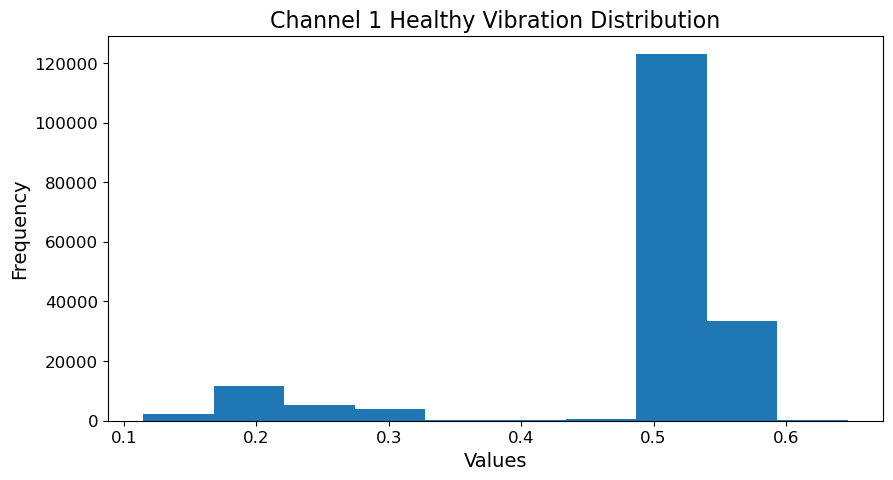

In [75]:
plt.figure(figsize=(10, 5))
plt.hist(df[df['FAULT'] == 0].reset_index(drop=True)['Channel 1'])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Frequency', fontdict= {'fontsize' : 14})
plt.xlabel('Values', fontdict= {'fontsize' : 14})
plt.title('Channel 1 Healthy Vibration Distribution', fontdict={'fontsize' : 16})

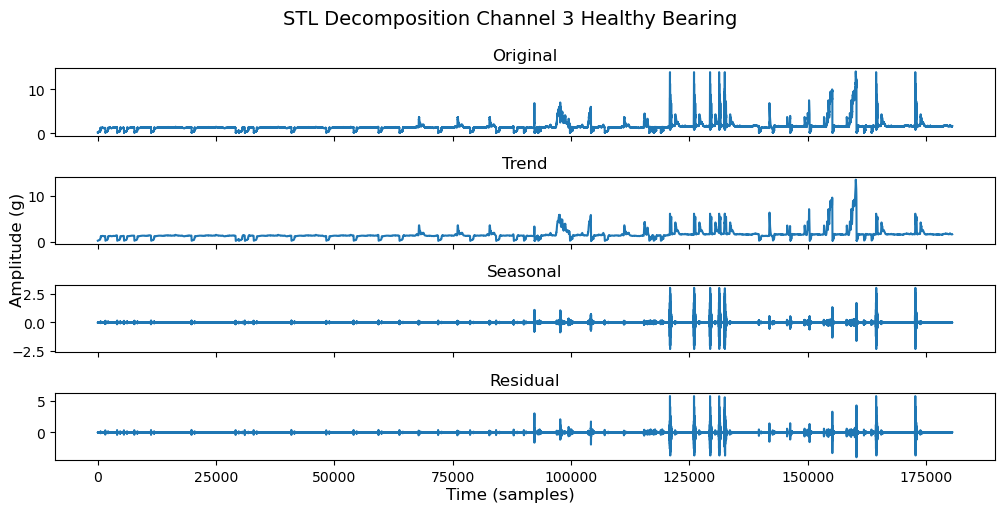

In [80]:
from statsmodels.tsa.seasonal import STL

# Perform STL decomposition
stl = STL(df[df['FAULT'] == 0].reset_index(drop=True)['Channel 3'], period=30)  # period = season length
result = stl.fit()

fig, axs = plt.subplots(4, 1, figsize=(10, 5), sharex=True)
axs[0].plot(df[df['FAULT'] == 0].reset_index(drop=True)['Channel 3'], label='Original')
axs[0].set_title('Original')
axs[1].plot(result.trend, label='Trend')
axs[1].set_title('Trend')
axs[2].plot(result.seasonal, label='Seasonal')
axs[2].set_title('Seasonal')
axs[3].plot(result.resid, label='Residual')
axs[3].set_title('Residual')
fig.suptitle('STL Decomposition Channel 3 Healthy Bearing', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# Overall X and Y labels
fig.text(0.5, 0.0001, 'Time (samples)', ha='center', fontsize=12)
fig.text(0.0001, 0.5, 'Amplitude (g)', va='center', rotation='vertical', fontsize=12)
plt.tight_layout()
plt.show()


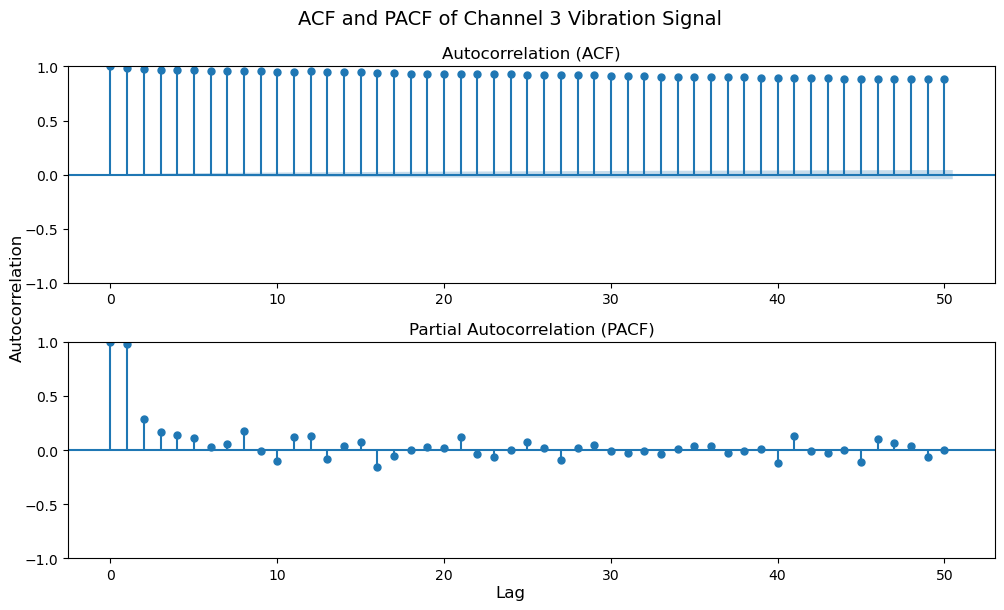

In [83]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assume 'series' is your vibration time series (e.g., Channel 1)
fig, axs = plt.subplots(2, 1, figsize=(10, 6))

# Autocorrelation plot
plot_acf(df[df['FAULT'] == 0].reset_index(drop=True)['Channel 3'], ax=axs[0], lags=50, alpha=0.05)
axs[0].set_title('Autocorrelation (ACF)')

# Partial Autocorrelation plot
plot_pacf(df[df['FAULT'] == 0].reset_index(drop=True)['Channel 3'], ax=axs[1], lags=50, alpha=0.05, method='ywm')  # or 'ld', 'ols'
axs[1].set_title('Partial Autocorrelation (PACF)')

# Overall layout adjustments
fig.suptitle('ACF and PACF of Channel 3 Vibration Signal', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
fig.text(0.5, 0.0001, 'Lag', ha='center', fontsize=12)
fig.text(0.0001, 0.5, 'Autocorrelation', va='center', rotation='vertical', fontsize=12)
plt.tight_layout()
plt.show()


In [85]:
from scipy.stats import boxcox

Text(0.5, 1.0, 'Channel 3 Healthy Vibration Normalization by log transform')

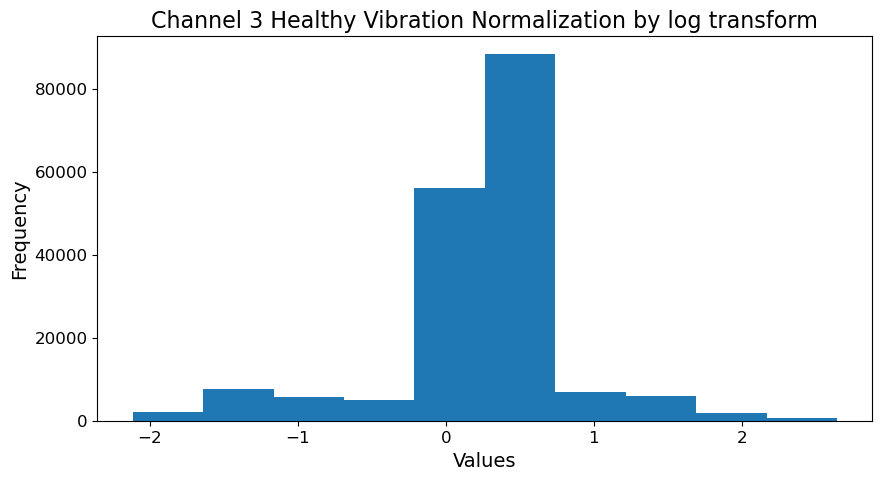

In [89]:
plt.figure(figsize=(10, 5))
plt.hist(np.log(df[df['FAULT'] == 0]['Channel 3']))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Frequency', fontdict= {'fontsize' : 14})
plt.xlabel('Values', fontdict= {'fontsize' : 14})
plt.title('Channel 3 Healthy Vibration Normalization by log transform', fontdict={'fontsize' : 16})

(array([ 2040.,  7762.,  5736.,  5045., 56013., 88357.,  6988.,  6069.,
         1875.,   672.]),
 array([-2.11513504, -1.63913109, -1.16312714, -0.68712318, -0.21111923,
         0.26488472,  0.74088868,  1.21689263,  1.69289658,  2.16890053,
         2.64490449]),
 <BarContainer object of 10 artists>)

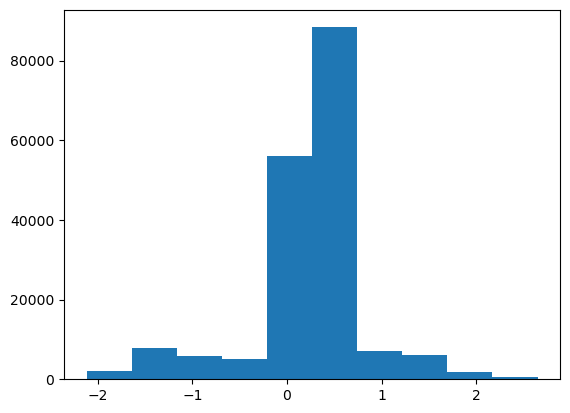

In [ ]:
plt.hist()

In [91]:
stl_c2 = STL(df[df['FAULT'] == 0].reset_index(drop=True)['Channel 2'], period=30)  # period = season length
result = stl_c2.fit()

In [93]:
signal_dt_c2 = stl = df[df['FAULT'] == 0]['Channel 2'] - result.trend

In [103]:
from sklearn.preprocessing import StandardScaler

sds = StandardScaler()

#signal_c2_norm = sds.fit_transform(signal_dt_c2.values.reshape(-1, 1))

In [112]:
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(output_distribution='normal')
data_normalized = qt.fit_transform(df[df['FAULT'] == 0]['Channel 2'].values.reshape(-1, 1)).flatten()

Text(0.5, 1.0, 'Channel 1 Healthy Vibration Normalization by Quantile transform')

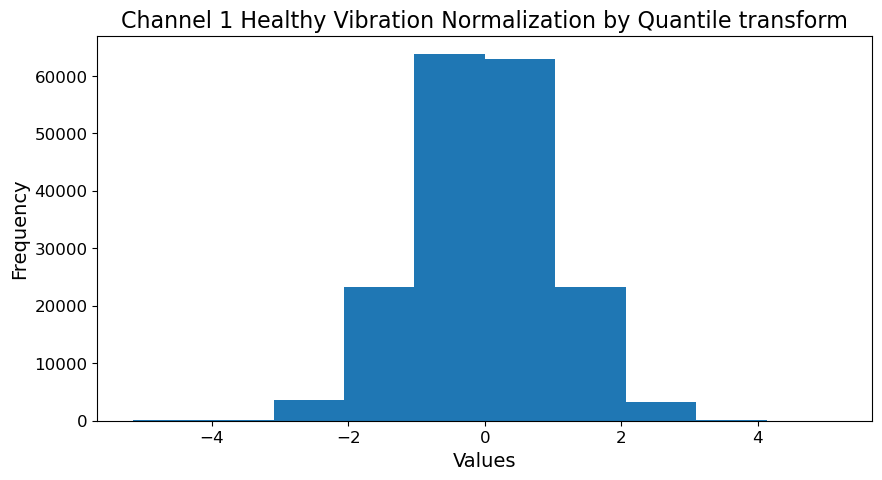

In [113]:


plt.figure(figsize=(10, 5))
plt.hist(sds.fit_transform(data_normalized.reshape(-1, 1)))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Frequency', fontdict= {'fontsize' : 14})
plt.xlabel('Values', fontdict= {'fontsize' : 14})
plt.title('Channel 1 Healthy Vibration Normalization by Quantile transform', fontdict={'fontsize' : 16})

In [110]:
c1 = pd.Series(data_normalized)

In [111]:
c1

0        -2.598868
1        -2.598868
2        -3.138102
3        -2.016318
4        -2.512848
            ...   
180552    1.811684
180553    1.838033
180554    1.862986
180555    1.852249
180556    1.842505
Length: 180557, dtype: float64

In [114]:
c2 = pd.Series(data_normalized)

In [115]:
c2

0        -1.707527
1        -1.707527
2        -2.076029
3        -1.687787
4        -1.682211
            ...   
180552    0.937021
180553    0.958260
180554    0.960541
180555    0.946718
180556    0.934649
Length: 180557, dtype: float64

In [116]:
c3 = np.log(df[df['FAULT'] == 0]['Channel 3'])

In [117]:
c3

1375     -1.607260
1376     -1.607260
1377     -1.799509
1378     -1.621627
1379     -1.827090
            ...   
390057    0.490731
390058    0.498567
390059    0.497990
390060    0.494733
390061    0.490137
Name: Channel 3, Length: 180557, dtype: float64

In [120]:
df_processed = pd.DataFrame(data = {'Channel_1_processed' : c1,
                     'Channel_2_processed' : c2,
                     'Channel_3_processed' : c3.reset_index(drop = True)})
df_processed

,Channel_1_processed,Channel_2_processed,Channel_3_processed
0,-2.598868,-1.707527,-1.607260
1,-2.598868,-1.707527,-1.607260
2,-3.138102,-2.076029,-1.799509
3,-2.016318,-1.687787,-1.621627
4,-2.512848,-1.682211,-1.827090
...,...,...,...
180552,1.811684,0.937021,0.490731
180553,1.838033,0.958260,0.498567
180554,1.862986,0.960541,0.497990
180555,1.852249,0.946718,0.494733


In [121]:
df_processed.to_csv(r"D:\Repositories\PhD\parsed_data\ICE_data\processed_Channels.csv", index = False)